# OSE-Summer School 2019
## Wk5: Computation, Pandas 1 lab

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Problem 1

In [2]:
s1 = pd.Series((np.arange(26)*2)**2-1, index=np.arange(26)*2)
s1[np.array([i % 3 == 0 for i in s1.index])] = 0
s1

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

### Problem 2

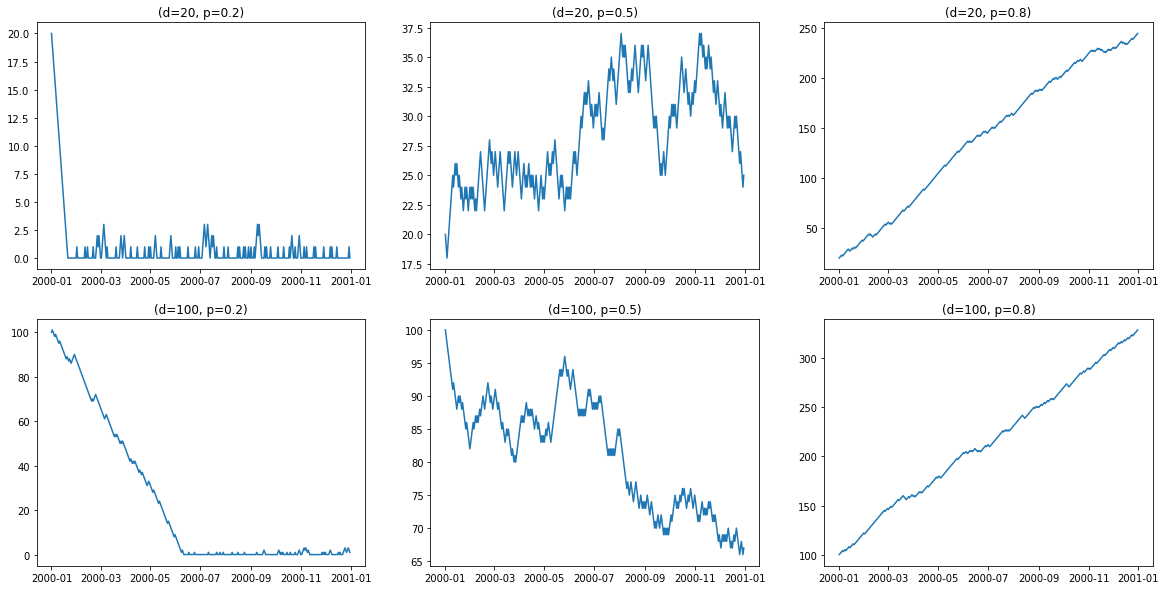

In [4]:
def random_walk(p, date, d=100):
    draws = np.random.binomial(1, p, len(date))
    s = pd.Series(d, index=date, name="stock price")
    for i in range(1,len(draws)):
        if draws[i] == 1:
            s[i] = s[i-1] + 1
        else:
            s[i] = s[i-1] - 1
            if s[i] < 0:
                s[i] = 0
    return s

date = pd.date_range("1/1/2000", "12/31/2000", freq='D')
s2 = random_walk(0.5, date)

p_set = [0.2, 0.5, 0.8]
d_set = [20, 100]

fig, axes = plt.subplots(len(d_set), len(p_set), figsize=[20,10])

for i in range(len(d_set)):
    d = d_set[i]
    for j in range(len(p_set)):
        p = p_set[j]
        s2 = random_walk(p, date, d)
        
        index = i*(len(p_set)) + (j+1)
        plt.subplot(2,3,index)
        plt.plot(s2)
        plt.title("(d=%d, p=%1.1f)" % (d, p))

### Problem 3

In [5]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [6]:
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex']=='M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [7]:
pd.merge(studentInfo, otherInfo, on='ID')[studentInfo['Sex']=='M'][['ID','Age','GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


### End